## EDA

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [78]:
df= pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.shape

(768, 9)

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Visualization

In [10]:
len(columns)/2

4.0

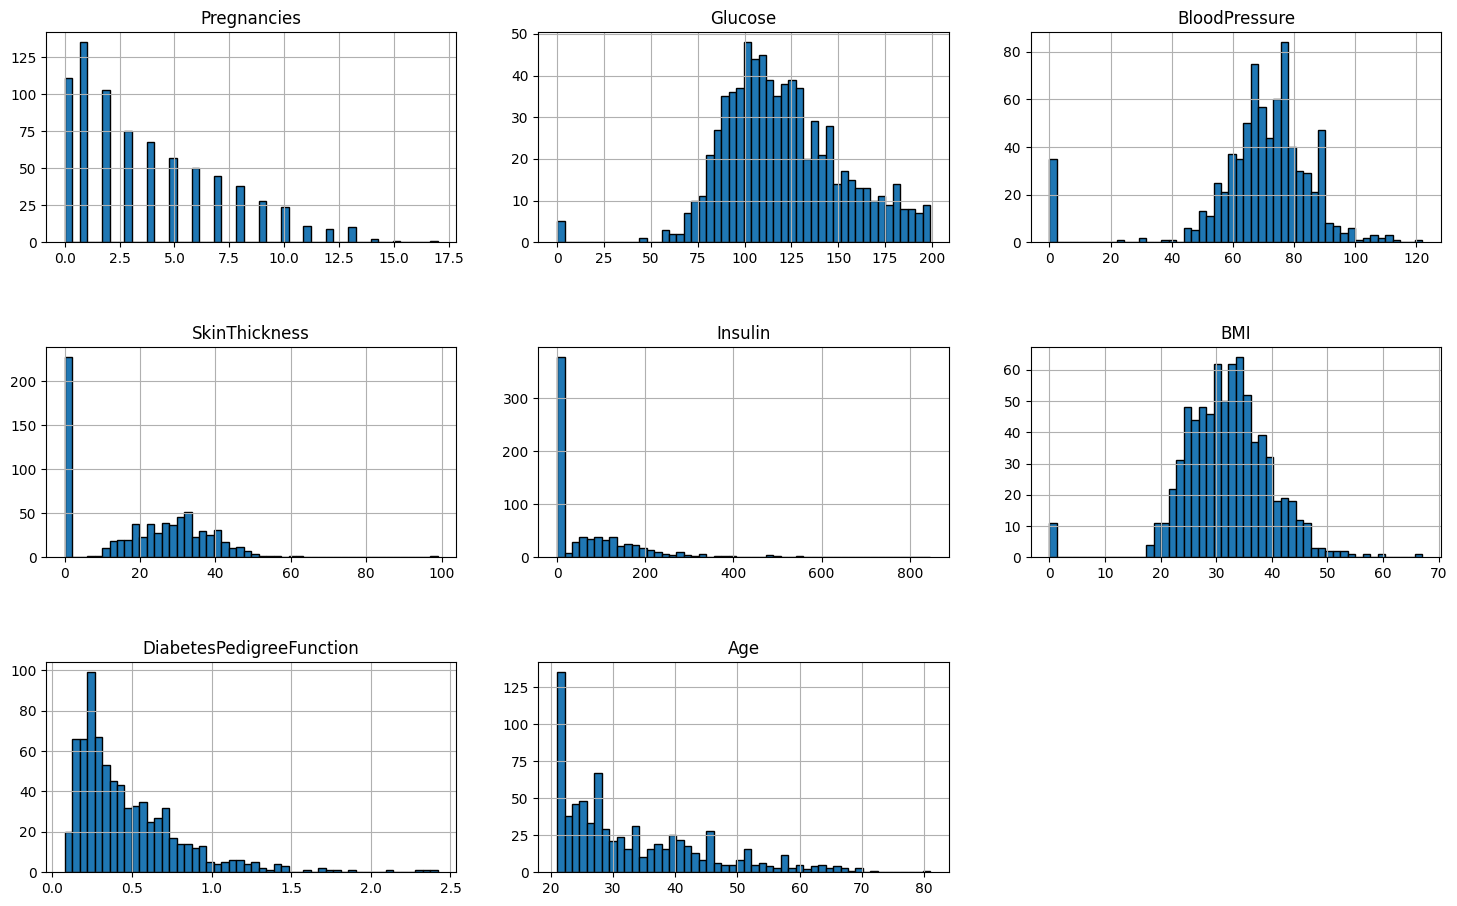

In [13]:
# plot features for both targets
columns= df.columns[:8]
length= len(columns)
plt.figure(figsize=(18,15))
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[i].hist(bins=50, edgecolor='black')
    plt.title(i)
plt.show();

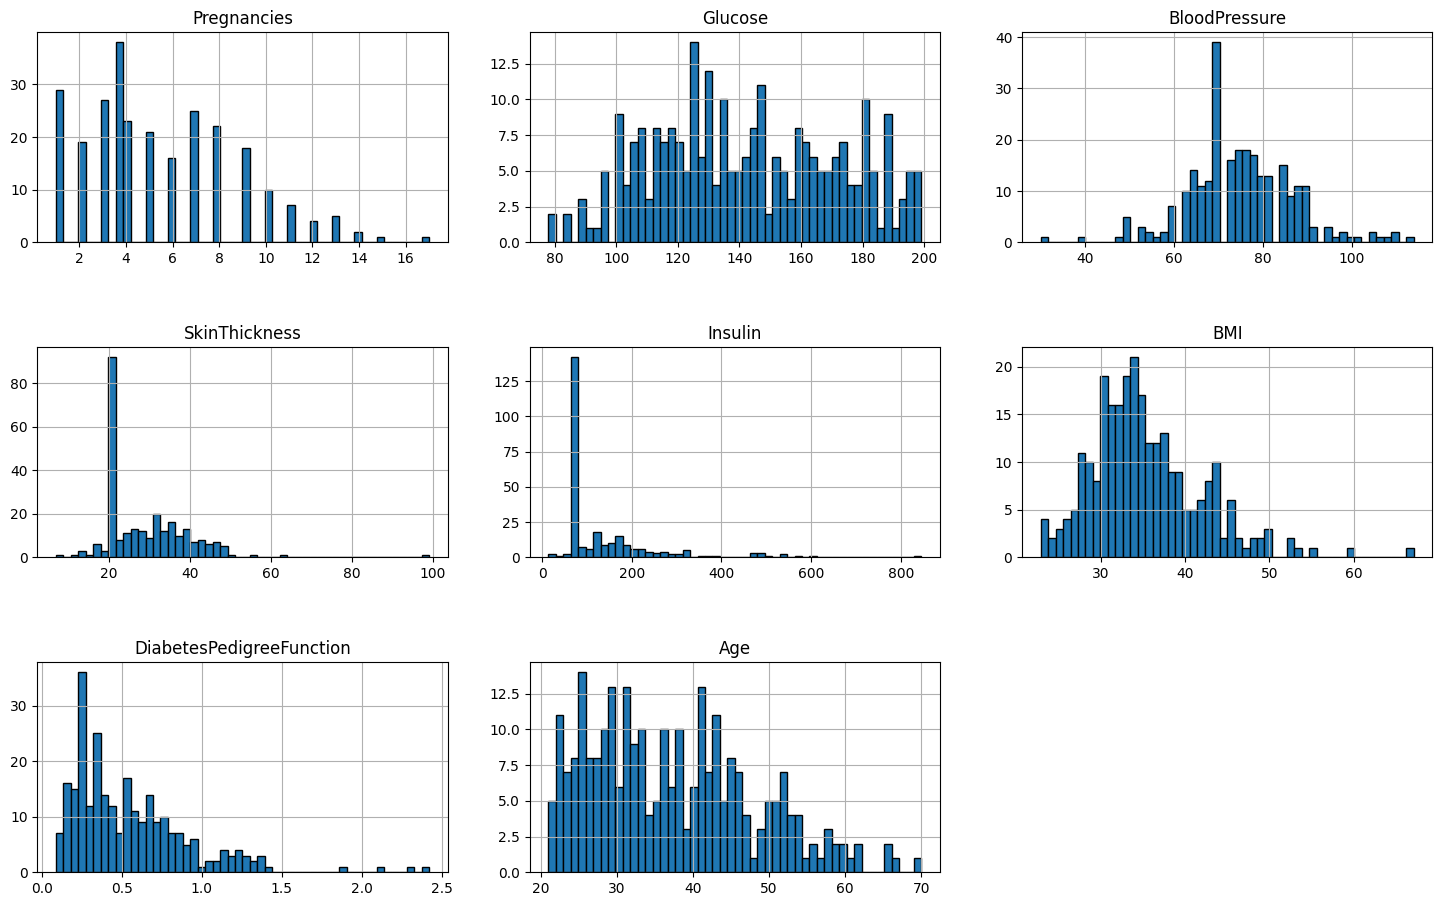

In [25]:
# plot features for only people with diabetes
df1= df[df['Outcome']==1]
columns= df.columns[:8]
length= len(columns)
plt.figure(figsize=(18,15))
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df1[i].hist(bins=50, edgecolor='black')
    plt.title(i)
plt.show();

/home/maly/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

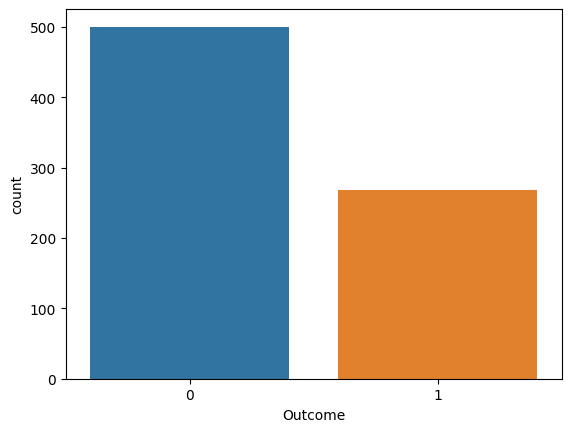

In [9]:
sns.countplot(df['Outcome'])

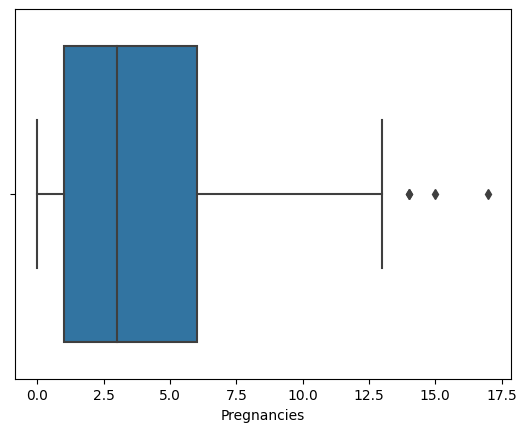

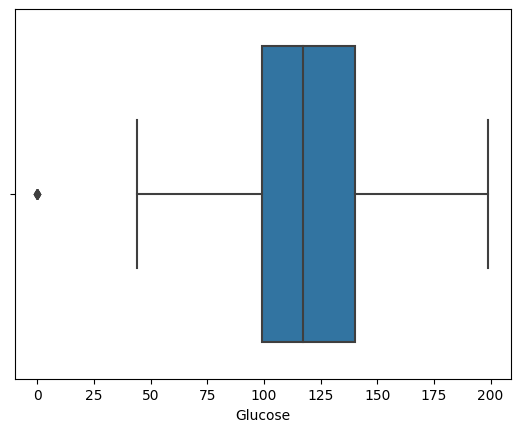

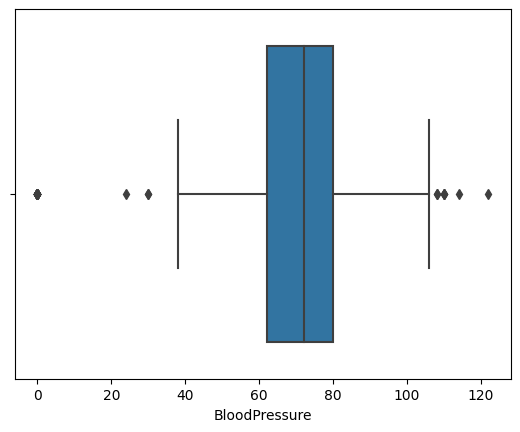

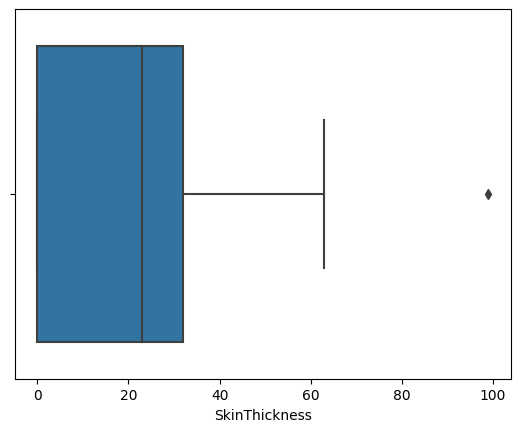

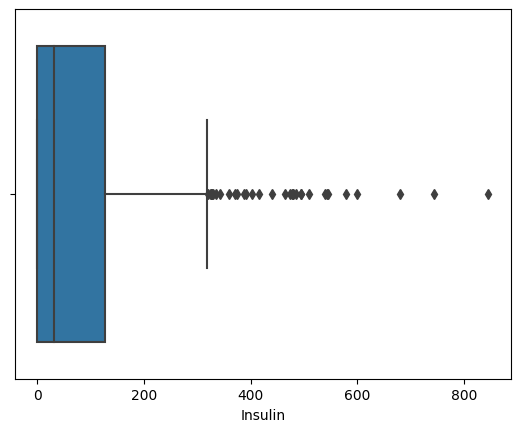

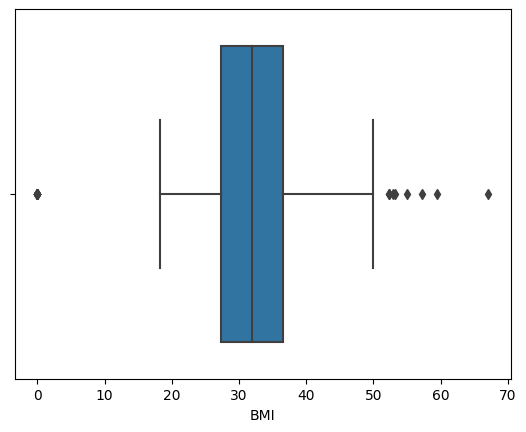

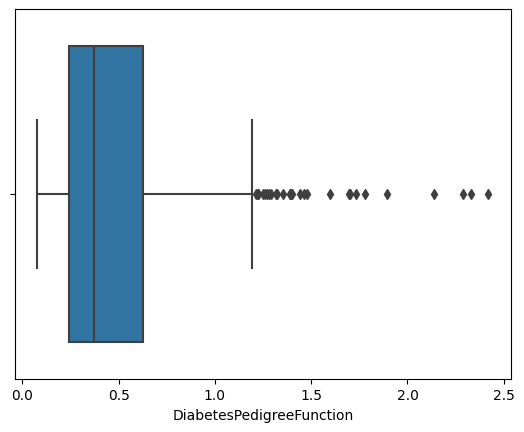

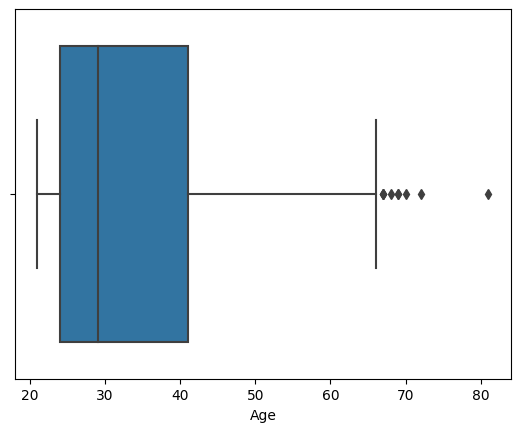

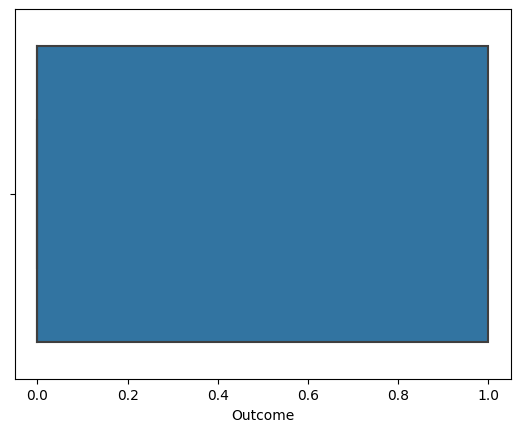

In [15]:
for i in df.columns:
    #print(i)
    sns.boxplot(df[i])
    plt.show();

<AxesSubplot:>

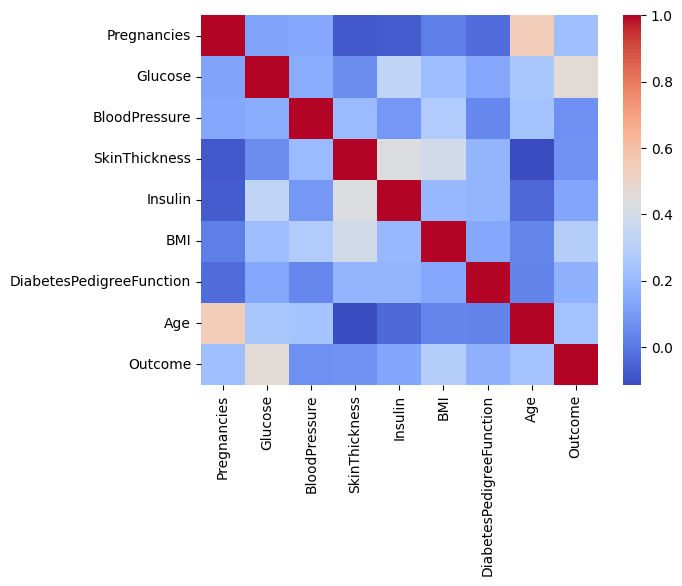

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm')

### Data Cleaning

### Missing Values

In [25]:
col_name= [col for col in df.columns[:8]]
mean= df[col_name].mean()
median= df[col_name].median()
#print(f'{i}: mean= {mean} - median= {median}')
print(pd.concat([mean,median], axis=1, keys=['mean', 'median']), end='\n')

                                mean    median
Pregnancies                 3.845052    3.0000
Glucose                   120.894531  117.0000
BloodPressure              69.105469   72.0000
SkinThickness              20.536458   23.0000
Insulin                    79.799479   30.5000
BMI                        31.992578   32.0000
DiabetesPedigreeFunction    0.471876    0.3725
Age                        33.240885   29.0000


In [80]:
missing_cols= df.columns[:-1]
missing_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [81]:
# replace zero values which were Nans in columns with the median value of that column
df[missing_cols]= df[missing_cols].replace(0, np.nan)
#df.head(10)

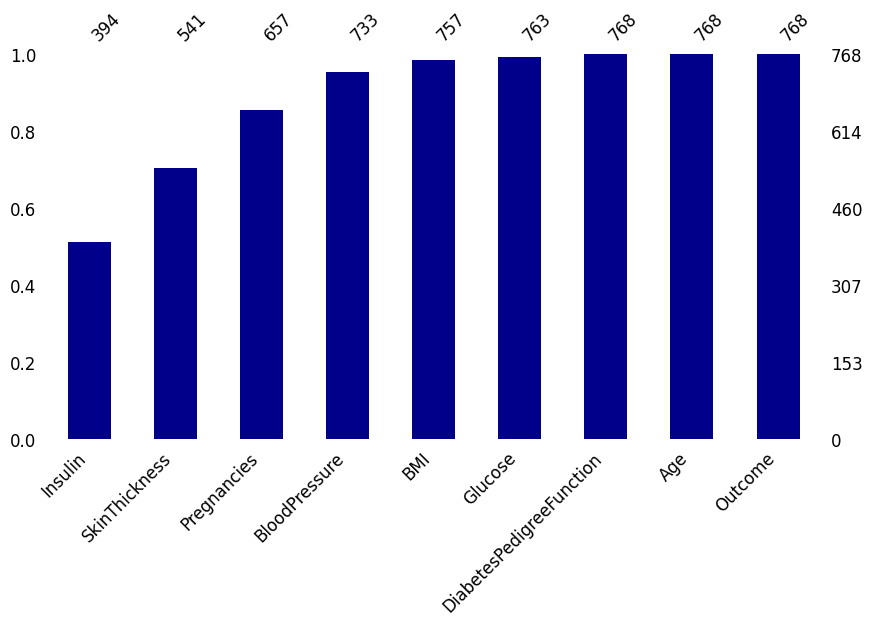

In [82]:
# visualize columns with missing values 
msno.bar(df, color='darkblue', sort='ascending', figsize=(10,5), fontsize=12)
plt.show();

In [83]:
df= df.fillna(df.groupby('Outcome').transform('median'))
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.377604,3.010736,1.000,2.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [38]:
col_name= [col for col in df.columns[:8]]
mean= df[col_name].mean()
median= df[col_name].median()
#print(f'{i}: mean= {mean} - median= {median}')
print(pd.concat([mean,median], axis=1, keys=['mean', 'median']), end='\n')

                                mean    median
Pregnancies                 4.377604    3.0000
Glucose                   121.677083  117.0000
BloodPressure              72.389323   72.0000
SkinThickness              29.089844   28.0000
Insulin                   141.753906  102.5000
BMI                        32.434635   32.0500
DiabetesPedigreeFunction    0.471876    0.3725
Age                        33.240885   29.0000


In [ ]:
# Another method is to replace the zeros directly
mis_col= [mis_col for mis_col in missing_cols]
df[mis_col]=df[mis_col].apply(lambda x:df[mis_col].median() if x==0 else x)

### Outlier Analysis

In [77]:
# print the low and up limits of each column
mis_col= [mis_col for mis_col in missing_cols]
quart1= df[mis_col].quantile(0.05)
quart3= df[mis_col].quantile(0.95)
interquart= quart3 - quart1
low_limit= quart1 - (1.5 * interquart)
up_limit= quart3 + (1.5 * interquart)
print(pd.concat([low_limit, up_limit], axis=1, keys=['low_limit', 'up_limit']), end='\n')

                          low_limit  up_limit
Pregnancies                -12.5000   23.5000
Glucose                     29.7500  163.7500
BloodPressure               -5.0000  147.0000
SkinThickness              -30.1250   88.4750
Insulin                    -45.2500  208.7500
BMI                        -11.0050   77.6350
DiabetesPedigreeFunction    -1.3484    2.6216
Age                        -34.5000  113.5000


In [84]:
def outlier_threshold(i):
    quart1= df[i].quantile(0.05)
    quart3= df[i].quantile(0.95)
    interquart= quart3 - quart1
    low_limit= quart1 - (1.5 * interquart)
    up_limit= quart3 + (1.5 * interquart)
    return low_limit, up_limit

In [85]:
for i in missing_cols:
    low_limit, up_limit= outlier_threshold(i)
    print(low_limit, up_limit)

-12.5 23.5
-71.5 332.5
-5.0 147.0
-30.124999999999993 88.475
-314.5 657.5
-11.004999999999995 77.63499999999999
-1.3483999999999996 2.621599999999999
-34.5 113.5


In [86]:
# check outliers
def check_outlier(i):
    low_limit, up_limit= outlier_threshold(i)
    if df[(df[i] > up_limit) | (df[i] < low_limit)].any(axis=None):
        return f'{i}: True'
    else:
        return f'{i}: False'

In [87]:
for i in missing_cols:
    print(check_outlier(i))

Pregnancies: False
Glucose: False
BloodPressure: False
SkinThickness: True
Insulin: True
BMI: False
DiabetesPedigreeFunction: False
Age: False


In [88]:
def replace_outliers(i):
    low_limit, up_limit= outlier_threshold(i)
    df.loc[(df[i] < low_limit), i]= low_limit
    df.loc[(df[i] > up_limit), i]= up_limit

In [89]:
for i in missing_cols:
    replace_outliers(i)
    print(check_outlier(i))

Pregnancies: False
Glucose: False
BloodPressure: False
SkinThickness: False
Insulin: False
BMI: False
DiabetesPedigreeFunction: False
Age: False


## Feature Engineering

In [90]:
# create BMI descriptor feature
# <18.5 == underweight
# 18.5 - 24.9 healthy
# 25 - 29.9 overweight
# >30 obese
df['BMI_desc']= df['BMI'].apply(lambda x:'underweight' if (x<18.5) else 'healthy' if (x>=18.5 and x<=24.9)\
                                else 'overweight' if (x>=25 and x<=29.9) else 'obese' if (x>=30) else 'None'
                               )

In [91]:
df.BMI_desc.value_counts()

obese          483
overweight     179
healthy        102
underweight      4
Name: BMI_desc, dtype: int64

<AxesSubplot:xlabel='BMI_desc', ylabel='Count'>

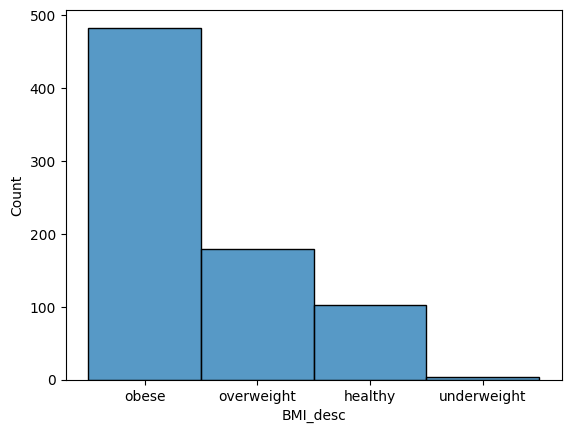

In [59]:
sns.histplot(df['BMI_desc'])

In [92]:
# create insulin desc feature
# 14 - 166 normal
# >166 abnormal
df['insulin_desc']= df['Insulin'].apply(lambda x:'normal' if (x>=14 and x<=166) else 'abnormal')

<AxesSubplot:xlabel='insulin_desc', ylabel='count'>

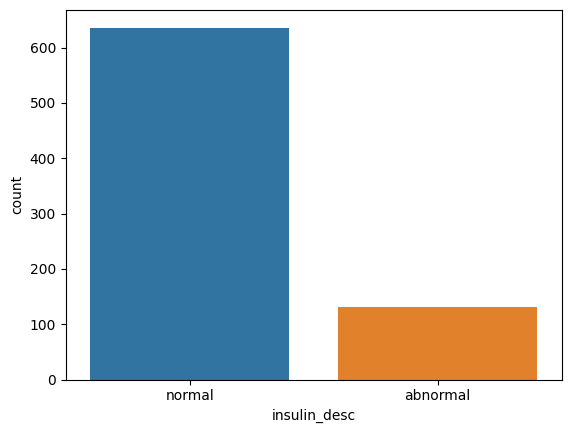

In [61]:
sns.countplot(df.insulin_desc)

In [63]:
df.shape

(768, 15)

### Adding more Features

In [93]:
# adding more features
df['age_cat']= df['Age'].apply(lambda x:'young' if x<30 else 'mature' if (x>=30 and x<60) else 'old')
df.loc[df['Pregnancies']==0, 'preg_cat']= 'never'
df.loc[df['Pregnancies']==1, 'preg_cat']= 'one'
df.loc[df['Pregnancies']>1, 'preg_cat']= 'many'

In [94]:
df.loc[df['Glucose'] < 70, 'Glucose_Cat']= 'Hipoglisemi'
df.loc[(df['Glucose'] >= 70) & (df['Glucose'] < 100), 'Glucose_Cat']= 'Normal'
df.loc[(df['Glucose'] >= 100) & (df['Glucose'] < 125), 'Glucose_Cat']= 'Imparied_Glucose'
df.loc[df['Glucose'] >= 125, 'Glucose_Cat']= 'Hperglisemi'

In [95]:
df['BMI_Age']= df['BMI'] * df['Age']
df['Preg_BMI']= df['Pregnancies'] * df['BMI']
df['Preg_Skin']= df['Pregnancies'] * df['SkinThickness']

In [96]:
df= pd.get_dummies(df, dtype= float)

In [97]:
df.shape

(768, 27)

In [170]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_desc_healthy,BMI_desc_obese,BMI_desc_overweight,BMI_desc_underweight,insulin_desc_abnormal,insulin_desc_normal,age_cat_mature,age_cat_old,age_cat_young,preg_cat_many,preg_cat_one,Glucose_Cat_Hipoglisemi,Glucose_Cat_Hperglisemi,Glucose_Cat_Imparied_Glucose,Glucose_Cat_Normal,BMI_Age,Preg_Skin
0,6.000000,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1,0,1,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1680.000000,210.000000
1,1.000000,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,824.600000,29.000000
2,8.000000,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,745.600000,164.291667
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0,0,0,1,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,590.100000,23.000000
4,3.845052,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1,0,1,0,0,1,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1422.300000,134.576823
5,5.000000,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0,0,0,1,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,768.000000,102.682292
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1,0,1,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,806.000000,96.000000
7,10.000000,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0,0,1,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1023.700000,205.364583
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1,0,1,0,0,1,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1616.500000,90.000000
9,8.000000,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1,0,1,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1727.599219,164.291667


<AxesSubplot:>

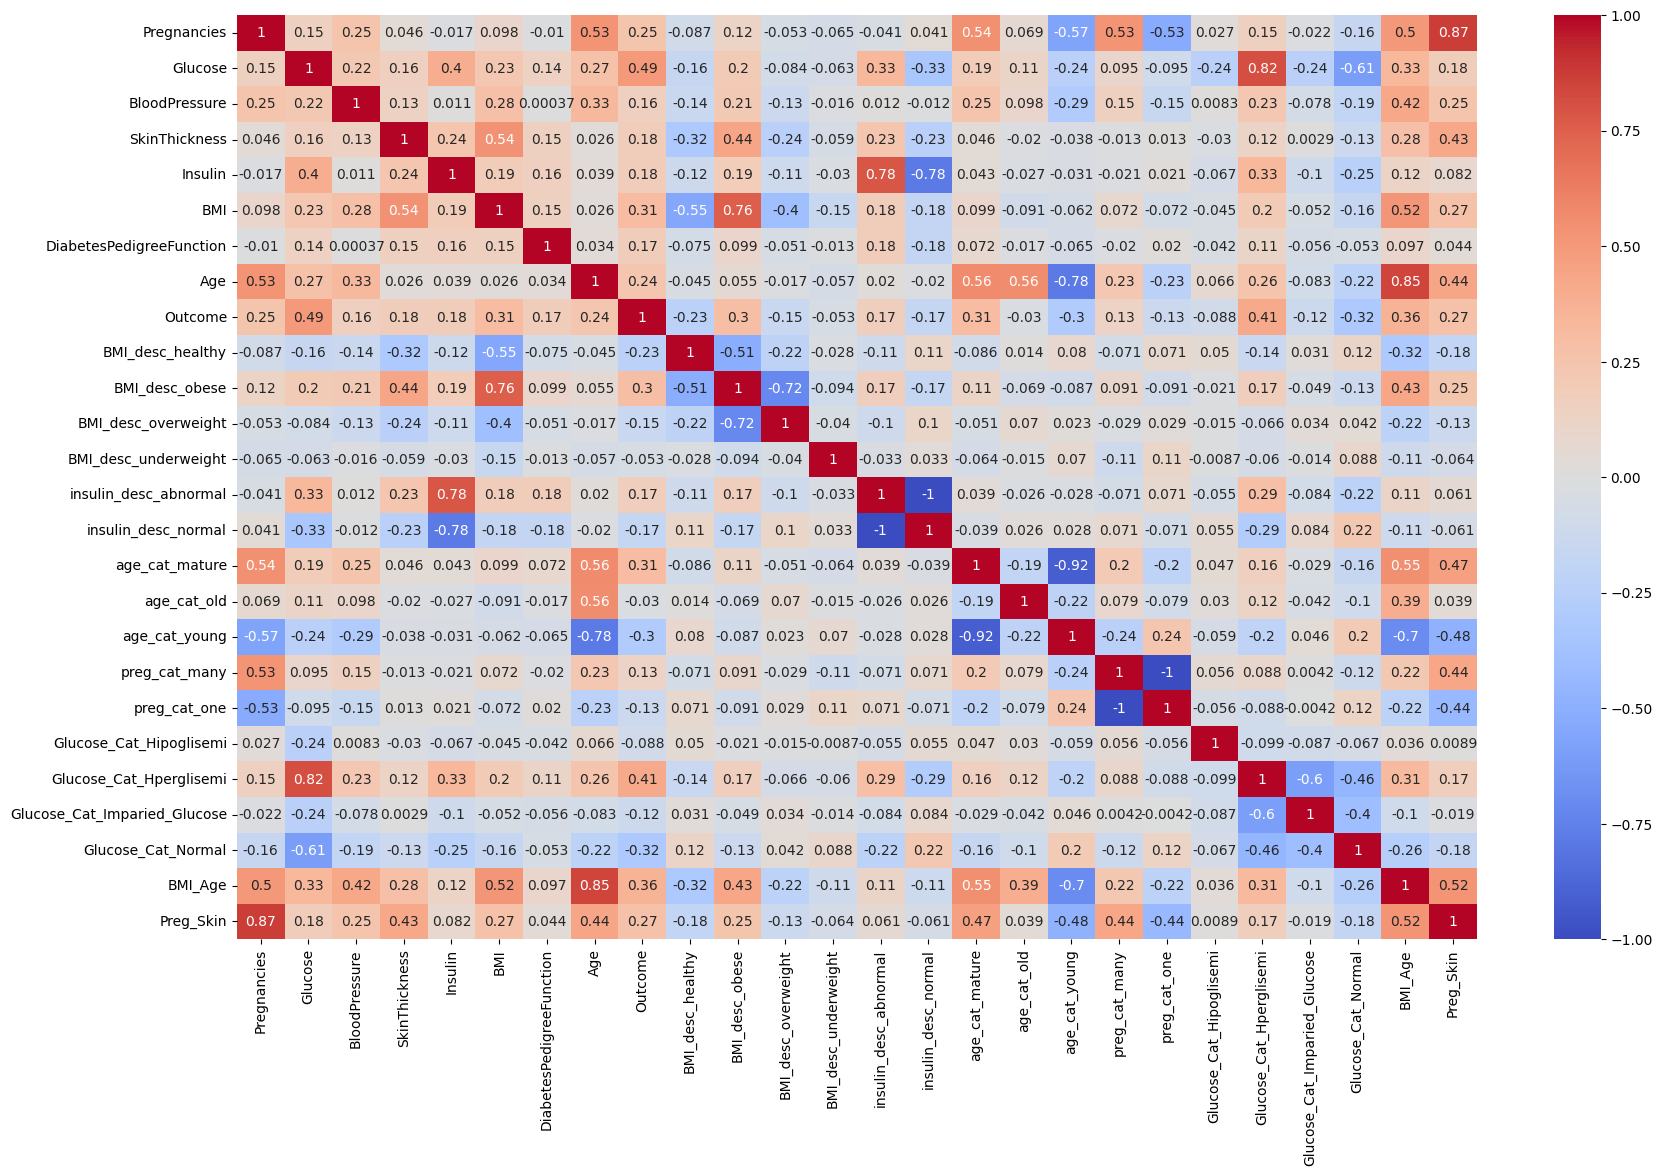

In [168]:
# Measure correlation between variables after adding features
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

## Modeling

### Base Model

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

In [111]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_desc_healthy',
       'BMI_desc_obese', 'BMI_desc_overweight', 'BMI_desc_underweight',
       'insulin_desc_abnormal', 'insulin_desc_normal'],
      dtype='object')

In [99]:
X= df.drop(columns=['Outcome'])
y= df['Outcome']

In [100]:
# base score without data scaling & after adding more features
base_model= LogisticRegression()
base_score= cross_val_score(base_model, X, y, cv=5).mean()
base_score

0.785179526355997

In [101]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=0)
X_train.shape, y_train.shape

((537, 26), (537,))

In [40]:
pd.DataFrame(y_train).value_counts()

Outcome
0          350
1          187
dtype: int64

In [102]:
# scaling of data without resampling
std_scaler= StandardScaler()
std_scaler.fit(X_train)
X_train_std= std_scaler.transform(X_train)

In [ ]:
pd.DataFrame(X_train_std, columns= X.columns.tolist()).describe()

In [103]:
base_model= LogisticRegression()
base_score_std= cross_val_score(base_model, X_train_std, y_train, cv=5, scoring='accuracy').mean()
base_score_std

0.8416060920733818

In [104]:
# compare with other models
knn= KNeighborsClassifier()
rf= RandomForestClassifier()
svc= SVC()
xgb= XGBClassifier(n_estimators=100, learning_rate= 0.01)
models= {'knn':knn, 'rf':rf, 'svc':svc, 'xgb':xgb}
scores={}
for k,v in models.items():
    #print(k,v)
    model_scores= cross_val_score(v, X_train_std, y_train, cv=5, scoring='accuracy').mean()
    scores[k]= model_scores

In [105]:
scores

{'knn': 0.834129456559363,
 'rf': 0.8714953271028036,
 'svc': 0.8285739010038077,
 'xgb': 0.8436137071651091}

In [152]:
pd.DataFrame(X_train_std).shape

(537, 25)

In [106]:
base_model.fit(X_train_std, y_train)

LogisticRegression()

In [107]:
X_test_std= std_scaler.transform(X_test)

In [108]:
y_pred_log= base_model.predict(X_test_std)

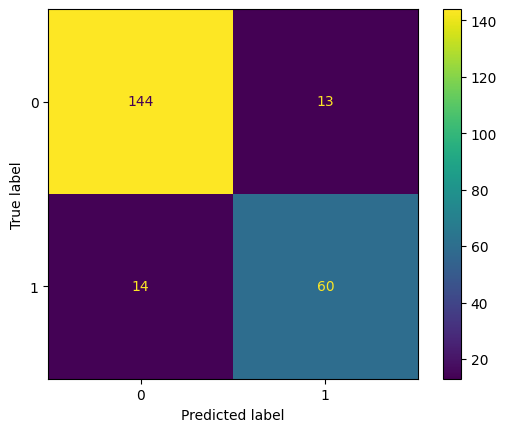

In [109]:
# after class balance
cm= confusion_matrix(y_test, y_pred_log, labels= base_model.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= base_model.classes_)
disp.plot()
plt.show();

In [110]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       157
           1       0.82      0.81      0.82        74

    accuracy                           0.88       231
   macro avg       0.87      0.86      0.87       231
weighted avg       0.88      0.88      0.88       231



### Random Forest Improved

In [111]:
rf= RandomForestClassifier()
rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [112]:
y_pred_rf= rf.predict(X_test_std)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.88      0.81      0.85        74

    accuracy                           0.90       231
   macro avg       0.90      0.88      0.89       231
weighted avg       0.90      0.90      0.90       231



### Feature Importance

In [113]:
rf.feature_importances_

array([0.02599836, 0.08648236, 0.0313873 , 0.06344198, 0.21126488,
       0.04588149, 0.03728039, 0.04694437, 0.06303804, 0.0580152 ,
       0.04140764, 0.00083099, 0.00826616, 0.00248041, 0.        ,
       0.08365752, 0.12906029, 0.009352  , 0.00198663, 0.01363805,
       0.00487212, 0.00343467, 0.        , 0.02189082, 0.00509466,
       0.00429368])

<AxesSubplot:>

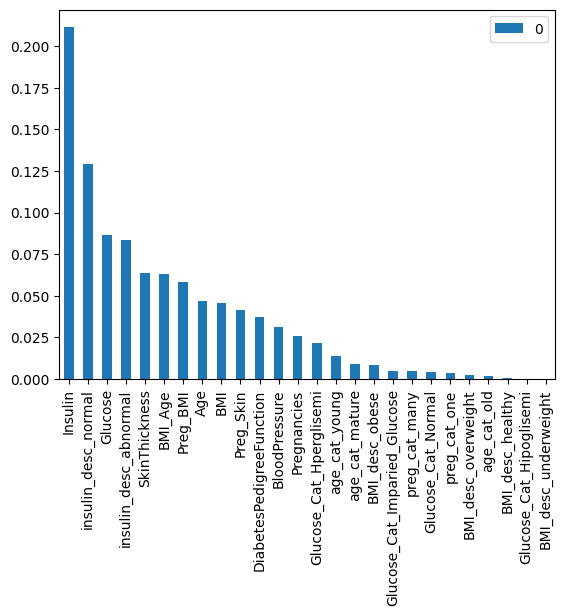

In [114]:
importance= rf.feature_importances_
pd.DataFrame(importance, index= X_train.columns).sort_values(by=0, ascending=False).plot.bar()

In [115]:
# Explore the important features for test results with permutation importance
perm_imp= permutation_importance(rf, X_test_std, y_test, n_repeats=10, n_jobs=-1, random_state=0)

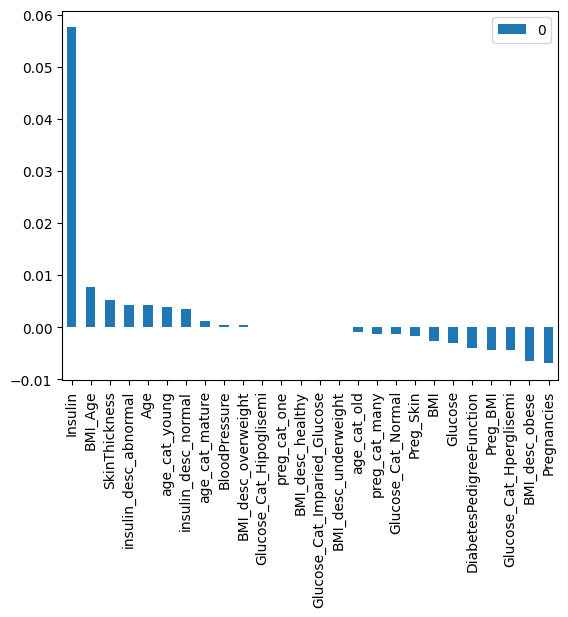

In [116]:
perm_mean= perm_imp.importances_mean
pd.DataFrame(perm_mean, index= X_train.columns).sort_values(by=0, ascending=False).plot.bar()
plt.show();

### Modeling after Class Balance

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm= SMOTE(sampling_strategy= 0.60)
X_train_resampled, y_train_resampled =sm.fit_resample(X_train, y_train)

In [ ]:
sns.countplot(y_train_resampled)

In [ ]:
# scaling of data after resampling
std_scaler= StandardScaler()
std_scaler.fit(X_train_resampled)
X_train_resampled_std= std_scaler.transform(X_train_resampled)

In [134]:
rf= RandomForestClassifier()
rf.fit(X_train_resampled_std, y_train_resampled)

RandomForestClassifier()

In [135]:
X_test_std

array([[-1.13277087,  2.51133539,  0.25212095, ...,  1.1641577 ,
        -0.7041461 , -0.55081581],
       [-0.80217415, -0.50739973,  0.08398813, ..., -0.85899015,
         1.42015983, -0.55081581],
       [-0.14098072, -1.52458222, -0.92480877, ..., -0.85899015,
        -0.7041461 ,  1.81548891],
       ...,
       [-1.13277087, -0.90114779, -1.09294159, ..., -0.85899015,
        -0.7041461 ,  1.81548891],
       [-1.13277087, -0.54021207,  0.25212095, ..., -0.85899015,
         1.42015983, -0.55081581],
       [ 1.84259957, -0.01521466,  0.42025377, ..., -0.85899015,
         1.42015983, -0.55081581]])

In [136]:
y_pred_rf= rf.predict(X_test_std)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       157
           1       0.91      0.80      0.85        74

    accuracy                           0.91       231
   macro avg       0.91      0.88      0.89       231
weighted avg       0.91      0.91      0.91       231

